In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
churn_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/churn-bigml-20.csv", sep = ',')


In [139]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [140]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [141]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [142]:
churn_df.shape

(667, 20)

**Data Processing**

In [143]:
# 0 indicates the first instance of No
churn_df['International plan'].drop_duplicates()

0      No
47    Yes
Name: International plan, dtype: object

In [144]:
# Label Encoder is used for mapping categorical data to 0, 1, 2, 3, 4, 5...
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [145]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [146]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])

In [147]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [148]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])

In [149]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


**Correlation**

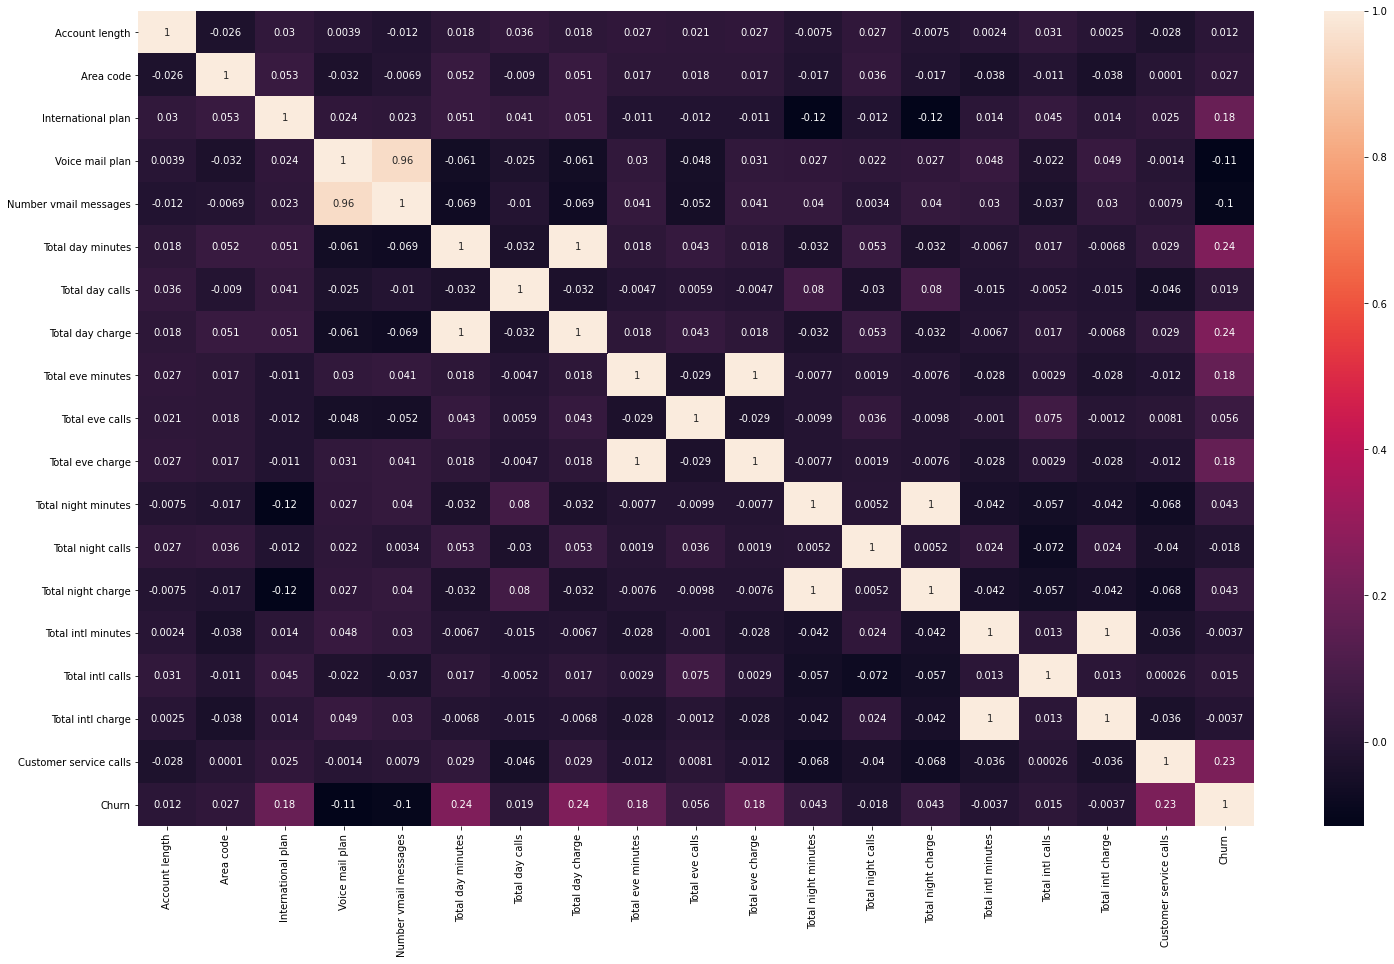

In [150]:
plt.figure(figsize=(25,15))
sns.heatmap(churn_df.corr('pearson'),annot = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


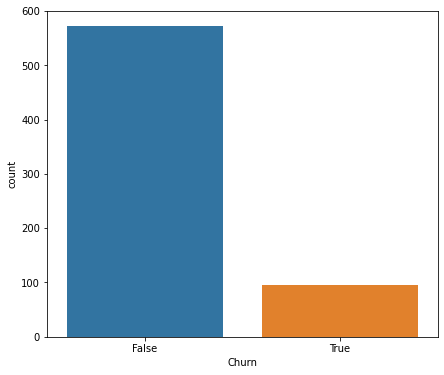

In [151]:
plt.figure(figsize=(7,6))
sns.countplot('Churn', data = churn_df)
plt.show()

**Feature Selection**

In [152]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [153]:
X = churn_df.drop(['State','Number vmail messages','Total day charge','Total eve charge', 'Total night charge', 'Total intl charge','Churn'], axis = 1)

In [154]:
Y = churn_df['Churn']

**CROSS VALIDATION**

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

**Decision Tree Classifier**

In [156]:
from sklearn.tree import DecisionTreeClassifier
# ID3 - Iterative Dichotomizer(3), criterion = 'gini' (measure of impurity)
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 9)

In [157]:
clf_tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [158]:
clf_tree.score(X_test, Y_test)

0.9402985074626866

In [159]:
clf_tree.score(X_train, Y_train)

0.9943714821763602

**Plotting Decision Tree**

In [160]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [161]:
dot_data = StringIO()
export_graphviz(clf_tree, out_file = dot_data, feature_names=list(X.columns), filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

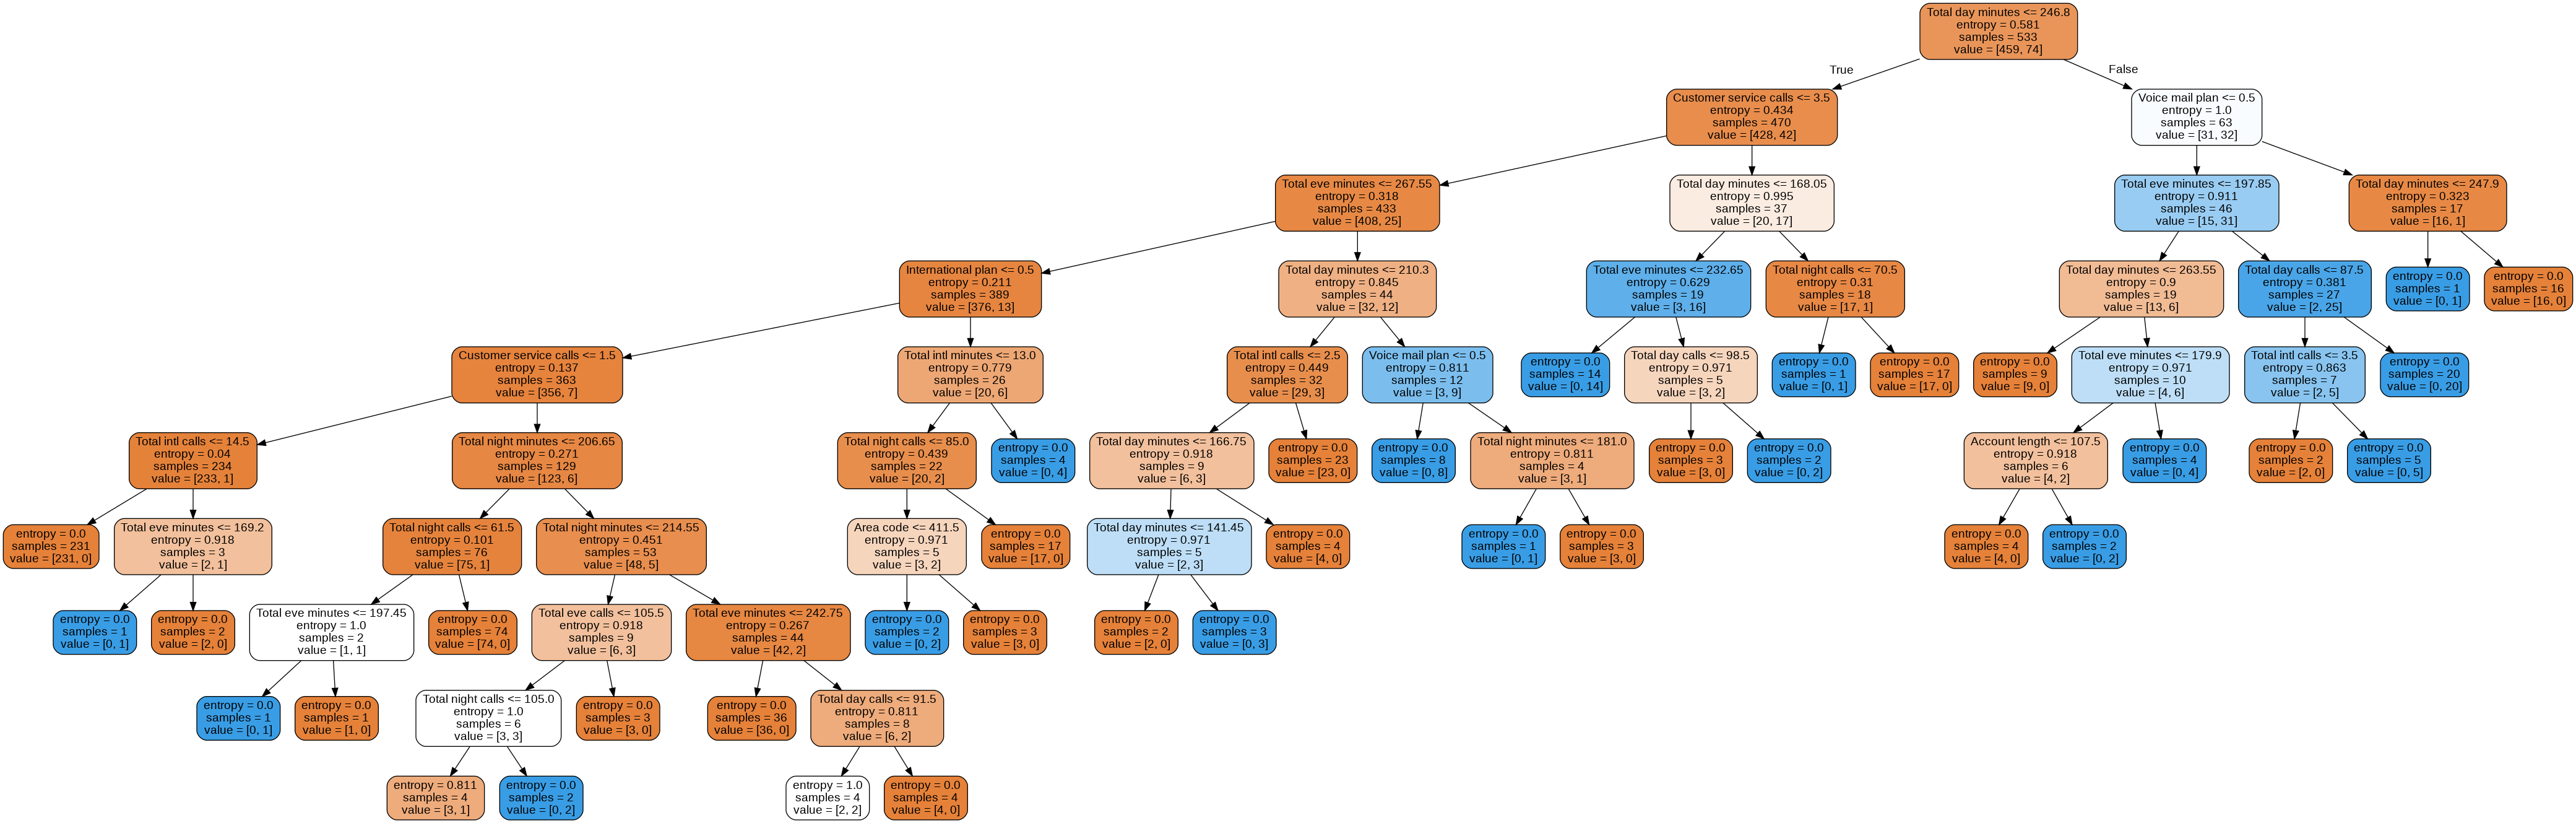

In [162]:
Image(graph.create_png())

In [163]:
clf_tree.max_depth

9

**Classification Metrics**

In [164]:
yhat = clf_tree.predict(X_test)

In [165]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)

array([[112,   1],
       [  7,  14]])

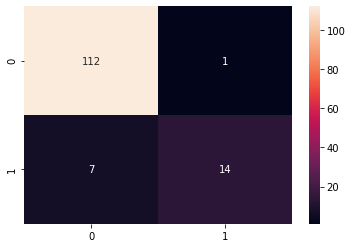

In [166]:
sns.heatmap(confusion_matrix(Y_test,yhat),annot=True, fmt = '0.0f')

In [167]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

       False       0.94      0.99      0.97       113
        True       0.93      0.67      0.78        21

    accuracy                           0.94       134
   macro avg       0.94      0.83      0.87       134
weighted avg       0.94      0.94      0.94       134



**Random Forest**
* Ensemble learning - Votes from multiple trees will be used for creating a Collection of Trees for predictions

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
# n_estimator = Number of Decision Tree, (default = 100), depth of each tree max_depth = 9
# Bootstrap - Randomly selecting data & creating samples

clf_rf = RandomForestClassifier(bootstrap=True, max_depth=9, n_estimators=100, random_state=11,criterion='entropy')

In [195]:
clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [196]:
clf_rf.score(X_test,Y_test)

0.9253731343283582

In [197]:
clf_rf.score(X_train,Y_train)

0.9906191369606003

In [198]:
yhat_rf = clf_rf.predict(X_test)

In [199]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test, yhat)

array([[112,   1],
       [  7,  14]])

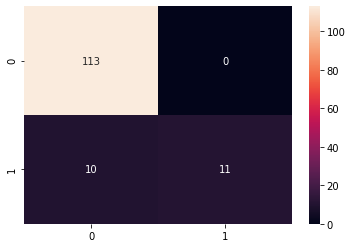

In [200]:
sns.heatmap(confusion_matrix(Y_test,yhat_rf),annot=True, fmt = '0.0f')

In [201]:
print(classification_report(Y_test, yhat_rf))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96       113
        True       1.00      0.52      0.69        21

    accuracy                           0.93       134
   macro avg       0.96      0.76      0.82       134
weighted avg       0.93      0.93      0.92       134

